# **Ch 0. 초기 설정 및 라이브러리 불러오기**

In [1]:
# 구글 드라이브로부터 데이터 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

# 변수 저장/불러오기
import pickle

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 결과 평가
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 시각화
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=120)
import seaborn as sns

Mounted at /content/gdrive


In [2]:
%cd /..
%cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

/
/content/gdrive/MyDrive/hanon_1st


In [3]:
# 변수 불러오기
with open("Heat_Exchanger_pp2.pkl", "rb") as file:
    X_scaled, output_np, scaler_X = pickle.load(file)

In [4]:
print(X_scaled.shape)
print(X_scaled)

(525, 10)
[[-1.25943068 -0.72054369 -1.10691166 ... -1.66548229 -0.97804137 -1.35296896]
 [-1.27010432 -0.72076076 -1.10691166 ... -1.86511467 -0.98325013 -1.3647593 ]
 [-1.27318778 -0.72085378 -1.10796458 ... -1.87448674 -0.98504626 -1.36676842]
 ...
 [ 0.4471567   0.06006587  0.41978673 ...  1.06728956  0.55525193  0.60612404]
 [ 0.45901626  0.06967912  0.42557764 ...  1.06880452  0.56291531  0.61474206]
 [ 0.46109168  0.05420455  0.43341585 ...  1.07243369  0.57369208  0.62425889]]


In [5]:
print(output_np.shape)
print(output_np)

(525, 1)
[['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['직렬 난방']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['CND Only']
 ['

# ===================================
# **Ch 1. Support Vector Machine (SVM)**
# ===================================

## Ch 1-1. 모델 생성 및 학습


In [6]:
# 분류 모델
from sklearn.svm import SVC

In [7]:
# 데이터를 학습용과 테스트용으로 분리
# 학습데이터 : 인공지능 모델 학습을 위한 데이터셋
# 평가데이터 : 학습된 인공지능 모델을 평가하기 위한 데이터셋
X_train, X_test, y_train, y_test = train_test_split(X_scaled, output_np.ravel(), test_size=0.3, random_state=42)

![Slide10](https://github.com/woooky/jinwook/assets/84065529/6de6cb5a-5a02-4c57-be48-349971042def)

In [8]:
# SVM 모델 생성
svm_model = SVC(kernel='linear')  # 선형 커널을 사용한 SVM

# 모델 학습
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

## Ch 1-2. 모델 평가

In [9]:
# 테스트 데이터로 예측
y_pred = svm_model.predict(X_test)

In [11]:
# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision : True Positives(정확히 양성으로 예측한 샘플 수)를 True Positives와 False Positives(실제는 음성이지만 양성으로 잘못 예측한 샘플 수)의 합으로 나눈 값입니다.
#*  Precision = True Positives / (True Positives + False Positives)

# Recall : True Positives를 True Positives와 False Negatives(실제는 양성이지만 음성으로 잘못 예측한 샘플 수)의 합으로 나눈 값입니다.
#*  Recall = True Positives / (True Positives + False Negatives)

# F1-score : 정밀도와 재현율의 조화평균, 0~1, 1일 때 완벽한 분류를 의미
#*  F1-score = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

    CND Only       0.90      0.89      0.90        53
 CND Only 난방       0.83      0.76      0.79        25
       직렬 난방       0.96      1.00      0.98        80

    accuracy                           0.92       158
   macro avg       0.90      0.88      0.89       158
weighted avg       0.92      0.92      0.92       158



![Slide12](https://github.com/woooky/jinwook/assets/84065529/c1781ff7-a520-4d3c-8d79-b56413be34c5)

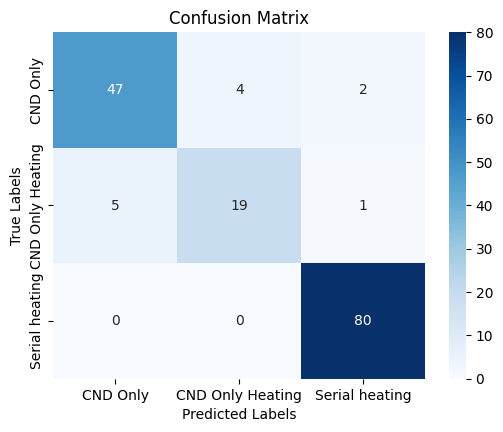

In [12]:
# 혼동 행렬(confusion matrix) 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CND Only', 'CND Only Heating','Serial heating'], yticklabels=['CND Only', 'CND Only Heating','Serial heating'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Ch 1-3. Training - Test dataset score 비교

Test Data - Classification Report:
              precision    recall  f1-score   support

    CND Only       0.90      0.89      0.90        53
 CND Only 난방       0.83      0.76      0.79        25
       직렬 난방       0.96      1.00      0.98        80

    accuracy                           0.92       158
   macro avg       0.90      0.88      0.89       158
weighted avg       0.92      0.92      0.92       158

Training Data - Classification Report:
              precision    recall  f1-score   support

    CND Only       0.91      0.95      0.93       118
 CND Only 난방       0.92      0.83      0.87        65
       직렬 난방       0.99      0.99      0.99       184

    accuracy                           0.95       367
   macro avg       0.94      0.92      0.93       367
weighted avg       0.95      0.95      0.95       367



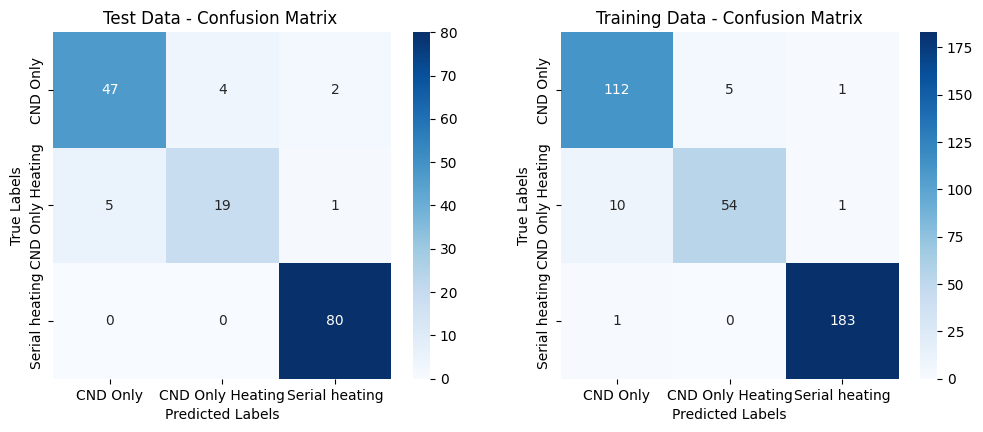

In [13]:
# 테스트 데이터로 예측 for test set
y_pred = svm_model.predict(X_test)

# 분류 보고서 출력 for test set
print("==================================================")
print("Test Data - Classification Report:")
print(classification_report(y_test, y_pred))

# 테스트 데이터로 예측 for training set
y_train_pred = svm_model.predict(X_train)

# 분류 보고서 출력 for training set
print("==================================================")
print("Training Data - Classification Report:")
print(classification_report(y_train, y_train_pred))


# 혼동 행렬(confusion matrix) 계산 for test set
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬(confusion matrix) 계산 for training set
cm2 = confusion_matrix(y_train, y_train_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(12, 4.5))
# Test
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CND Only', 'CND Only Heating','Serial heating'], yticklabels=['CND Only', 'CND Only Heating','Serial heating'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Test Data - Confusion Matrix ')
# Training
plt.subplot(1,2,2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['CND Only', 'CND Only Heating','Serial heating'], yticklabels=['CND Only', 'CND Only Heating','Serial heating'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Training Data - Confusion Matrix')
plt.show()

## Ch 1-4. 임의의 input에 대한 output 예측

In [14]:
# 알고싶은 input
X_unknown=[-15,  3.3, -18,  6, -20,  1808, 2.2, -9.6,  0.6, -18]

# input 스케일링
X_unknown_scaled=scaler_X.transform([X_unknown])

# 예측
y_pred_unknown = svm_model.predict(X_unknown_scaled)
print(y_pred_unknown)

['직렬 난방']


# ===================================
# **Ch 2. Random Forest Classification (RFC)**
# ===================================

## Ch 2-1. 모델 생성 및 학습

In [15]:
# 분류 모델
from sklearn.ensemble import RandomForestClassifier

In [16]:
# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, output_np.ravel(), test_size=0.3, random_state=42)

# SVM 모델 생성
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Ch 2-2. 모델 평가

In [17]:
# 테스트 데이터로 예측
y_pred = RF_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Precision : True Positives(정확히 양성으로 예측한 샘플 수)를 True Positives와 False Positives(실제는 음성이지만 양성으로 잘못 예측한 샘플 수)의 합으로 나눈 값입니다.
#*  Precision = True Positives / (True Positives + False Positives)

# Recall : True Positives를 True Positives와 False Negatives(실제는 양성이지만 음성으로 잘못 예측한 샘플 수)의 합으로 나눈 값입니다.
#*  Recall = True Positives / (True Positives + False Negatives)

# F1-score : 정밀도와 재현율의 조화평균, 0~1, 1일 때 완벽한 분류를 의미
#*  F1-score = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

    CND Only       1.00      0.98      0.99        53
 CND Only 난방       0.96      1.00      0.98        25
       직렬 난방       1.00      1.00      1.00        80

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158



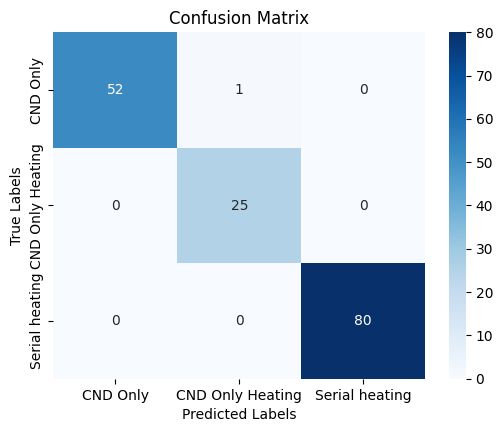

In [18]:
# 혼동 행렬(confusion matrix) 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CND Only', 'CND Only Heating','Serial heating'], yticklabels=['CND Only', 'CND Only Heating','Serial heating'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Ch 2-3. 임의의 input에 대한 output 예측

In [19]:
# 알고싶은 input
X_unknown=[-15,  3.3, -18,  6, -20,  1808, 2.2, -9.6,  0.6, -18]

# input 스케일링
X_unknown_scaled=scaler_X.transform([X_unknown])

# 예측
y_pred_unknown = RF_model.predict(X_unknown_scaled)
print(y_pred_unknown)

['직렬 난방']


# ===================================
# **Ch3. Deep Neural Network(DNN)-based Classification**
# ===================================

## SVM vs RF vs DNN
![Slide13](https://github.com/woooky/jinwook/assets/84065529/b5584657-d266-46d8-aabe-af2251f3807d)
![Slide14](https://github.com/woooky/jinwook/assets/84065529/9d291261-7424-42f0-a111-0432dad5b552)

## Ch 3-1. 모델 생성 및 학습

In [20]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

In [21]:
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
y_onehot = onehot_encoder.fit_transform(output_np)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
print(y_onehot)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [23]:
# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.3, random_state=42)

# DNN 모델 구성
DNN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 클래스 개수에 맞는 출력층 설정 (3개 클래스)
])

# 모델 컴파일
DNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

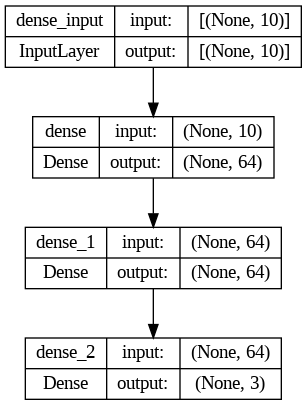

In [24]:
# DNN 아키텍쳐 시각화
tf.keras.utils.plot_model(DNN_model, to_file='dnn_architecture_for_class.png', show_shapes=True, show_layer_names=True)

In [25]:
# 모델 학습
DNN_model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.9694 - accuracy: 0.6131
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8212 - accuracy: 0.7003
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7146 - accuracy: 0.7411
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6270 - accuracy: 0.7875
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.8038
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.8229
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8474
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.8801
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.9183
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.9346
Epoch 11/

## Ch 3-2. 모델 평가

In [26]:
# 테스트 데이터로 예측
y_pred = DNN_model.predict(X_test)
print(y_pred)

5/5 [==============================] - 0s 5ms/step
[[9.47736112e-09 2.50862049e-05 9.99974787e-01]
 [2.85182318e-06 9.99941170e-01 5.59348809e-05]
 [3.09665129e-03 1.29808962e-01 8.67094457e-01]
 [9.99997437e-01 1.54559177e-06 9.46533646e-07]
 [9.98767376e-01 3.58029793e-05 1.19680515e-03]
 [2.85634343e-07 3.05252208e-04 9.99694467e-01]
 [1.37199066e-07 2.69564451e-04 9.99730349e-01]
 [1.06705655e-03 9.90630805e-01 8.30208231e-03]
 [9.99283552e-01 4.45722457e-04 2.70645367e-04]
 [9.99553382e-01 3.92602378e-04 5.39909634e-05]
 [2.51318328e-04 3.16888024e-03 9.96579707e-01]
 [1.12851971e-07 9.99998748e-01 1.12631187e-06]
 [9.99090910e-01 2.88346873e-05 8.80227250e-04]
 [1.91670239e-07 9.99997914e-01 1.75110165e-06]
 [1.83130339e-06 1.01049303e-03 9.98987675e-01]
 [9.99047816e-01 8.86887952e-04 6.52363378e-05]
 [2.52519792e-04 8.63220775e-04 9.98884320e-01]
 [9.92704690e-01 6.64828764e-03 6.46790897e-04]
 [3.08702255e-08 1.46497085e-04 9.99853611e-01]
 [9.99987543e-01 3.10003452e-06 9.262

In [27]:
print(sum(y_pred[0]))

0.9999998829175354


In [28]:
# 테스트 데이터로 예측
y_pred_tmp = DNN_model.predict(X_test)
y_pred = np.argmax(y_pred_tmp, axis=1)
# argmax : 가장 큰 값을 가지는 원소의 index 반환
print(y_pred)

5/5 [==============================] - 0s 3ms/step
[2 1 2 0 0 2 2 1 0 0 2 1 0 1 2 0 2 0 2 0 2 1 2 2 2 2 2 1 2 2 1 0 1 2 0 0 2 0 2 0 0 0 2 0 2 2 0 2 1 0 2 0 1 2 2 2 0 0 2
 2 2 2 2 1 0 1 0 0 0 2 0 2 0 0 0 0 2 2 2 2 2 2 2 1 0 1 2 0 2 2 2 0 1 0 0 0 2 2 2 2 2 1 2 1 0 2 0 2 1 0 2 2 2 0 2 2 2 0
 1 0 2 2 2 2 2 2 1 0 1 0 1 2 2 0 1 2 2 2 2 1 0 1 2 0 2 0 2 0 0 2 2 2 0 1 2 2 2 0]


In [29]:
# 테스트 데이터로 예측
y_pred_tmp = DNN_model.predict(X_test)
y_pred = np.argmax(y_pred_tmp, axis=1) # argmax 가장 큰 값을 가지는 원소의 index 반환

# 정확도 평가
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 분류 보고서 출력
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))

# Precision : True Positives(정확히 양성으로 예측한 샘플 수)를 True Positives와 False Positives(실제는 음성이지만 양성으로 잘못 예측한 샘플 수)의 합으로 나눈 값입니다.
#*  Precision = True Positives / (True Positives + False Positives)

# Recall : True Positives를 True Positives와 False Negatives(실제는 양성이지만 음성으로 잘못 예측한 샘플 수)의 합으로 나눈 값입니다.
#*  Recall = True Positives / (True Positives + False Negatives)

# F1-score : 정밀도와 재현율의 조화평균, 0~1, 1일 때 완벽한 분류를 의미
#*  F1-score = 2 * (정밀도 * 재현율) / (정밀도 + 재현율)

5/5 [==============================] - 0s 3ms/step
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        25
           2       1.00      1.00      1.00        80

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158



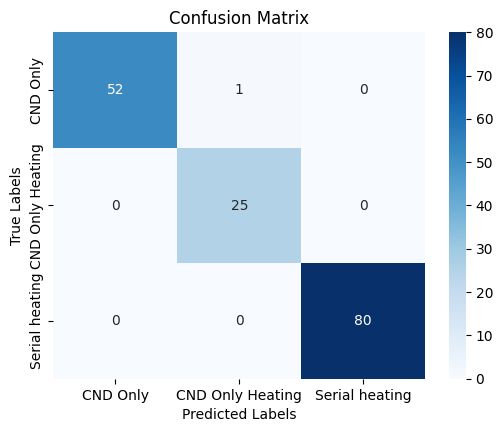

In [30]:
# 혼동 행렬(confusion matrix) 계산
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['CND Only', 'CND Only Heating','Serial heating'], yticklabels=['CND Only', 'CND Only Heating','Serial heating'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Ch 3-3. 임의의 input에 대한 output 예측

In [31]:
# 알고싶은 input
X_unknown=[-15,  3.3, -18,  6, -20,  1808, 2.2, -9.6,  0.6, -18]

# input 스케일링
X_unknown_scaled=scaler_X.transform([X_unknown])

# 예측
y_pred_unknown = DNN_model.predict(X_unknown_scaled)
print(y_pred_unknown)
print(np.argmax(y_pred_unknown, axis=1))

1/1 [==============================] - 0s 26ms/step
[[0.07821872 0.00197509 0.91980624]]
[2]
